In [1]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [2]:
# Reading dataset 
df = pd.read_csv("concrete_data.csv")
df.head()

concrete_data  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0          540.0                 0.0      0.0  162.0               2.5   
1          540.0                 0.0      0.0  162.0               2.5   
2          332.5               142.5      0.0  228.0               0.0   
3          332.5               142.5      0.0  228.0               0.0   
4          198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   concrete_data       1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
df.describe()

concrete_data  Blast Furnace Slag      Fly Ash        Water  \
count    1030.000000         1030.000000  1030.000000  1030.000000   
mean      281.167864           73.895825    54.188350   181.567282   
std       104.506364           86.279342    63.997004    21.354219   
min       102.000000            0.000000     0.000000   121.800000   
25%       192.375000            0.000000     0.000000   164.900000   
50%       272.900000           22.000000     0.000000   185.000000   
75%       350.000000          142.950000   118.300000   192.000000   
max       540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

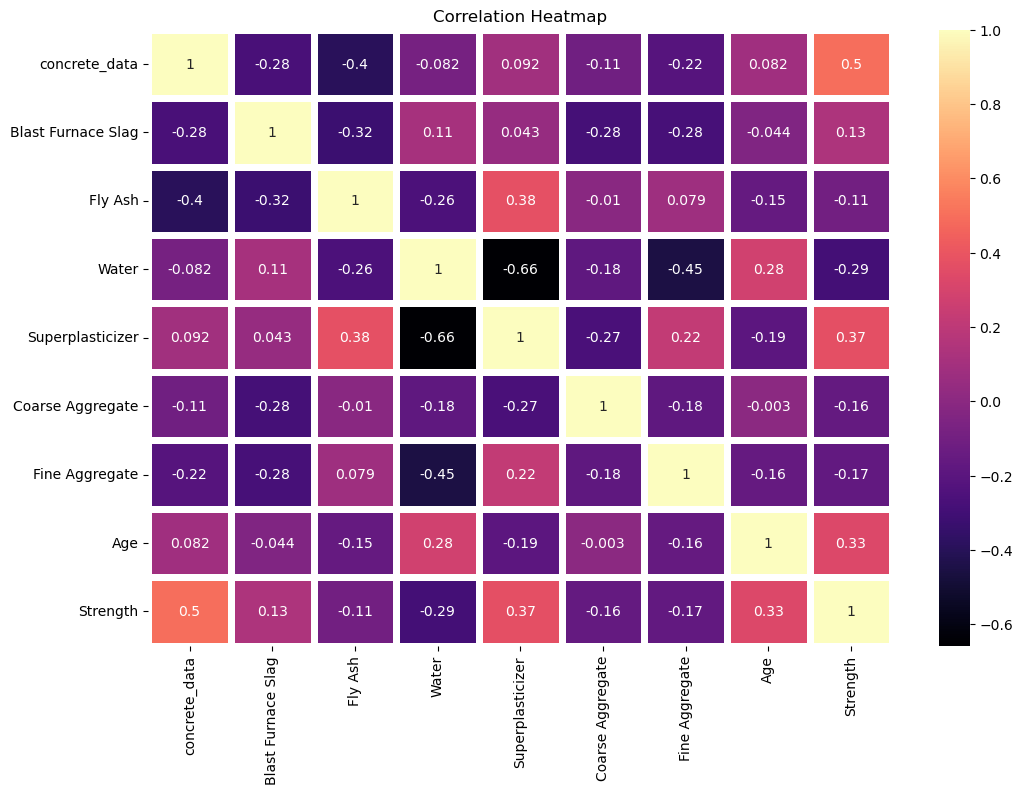

In [5]:
# Data analysis by applying charts
# 1. Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='magma', linewidths= 5)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# 3. Zmiana na wykresy zależności
selected_features = ['concrete_data', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']

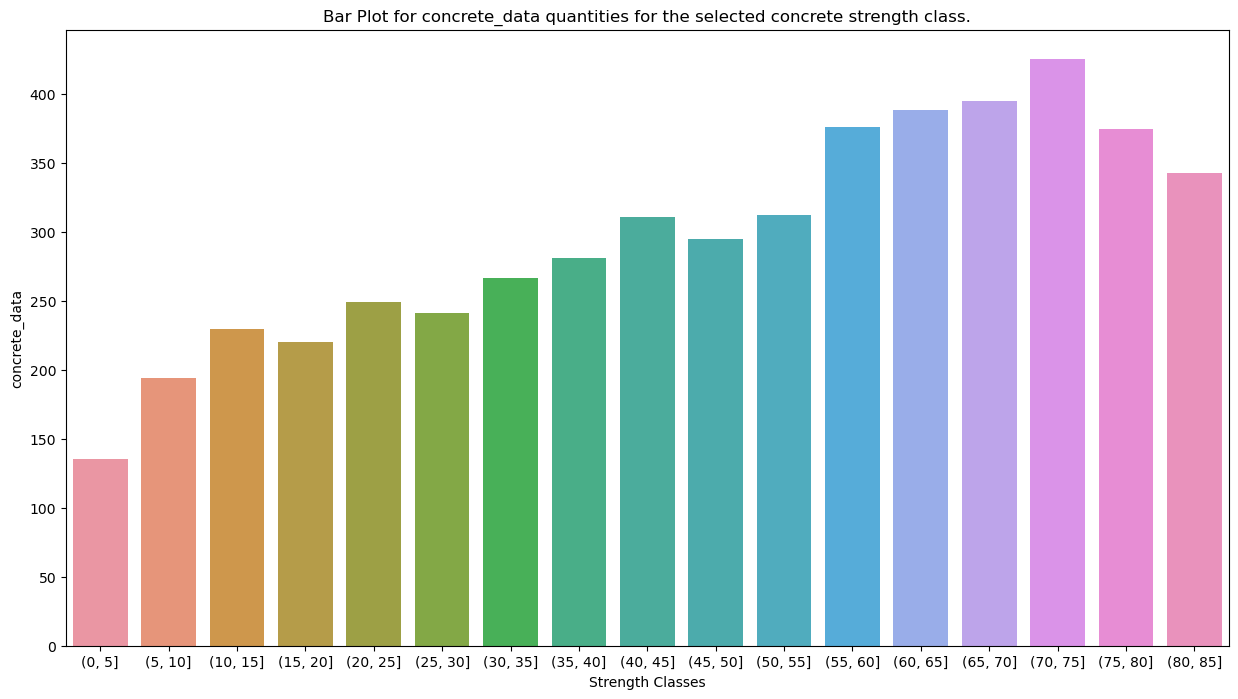

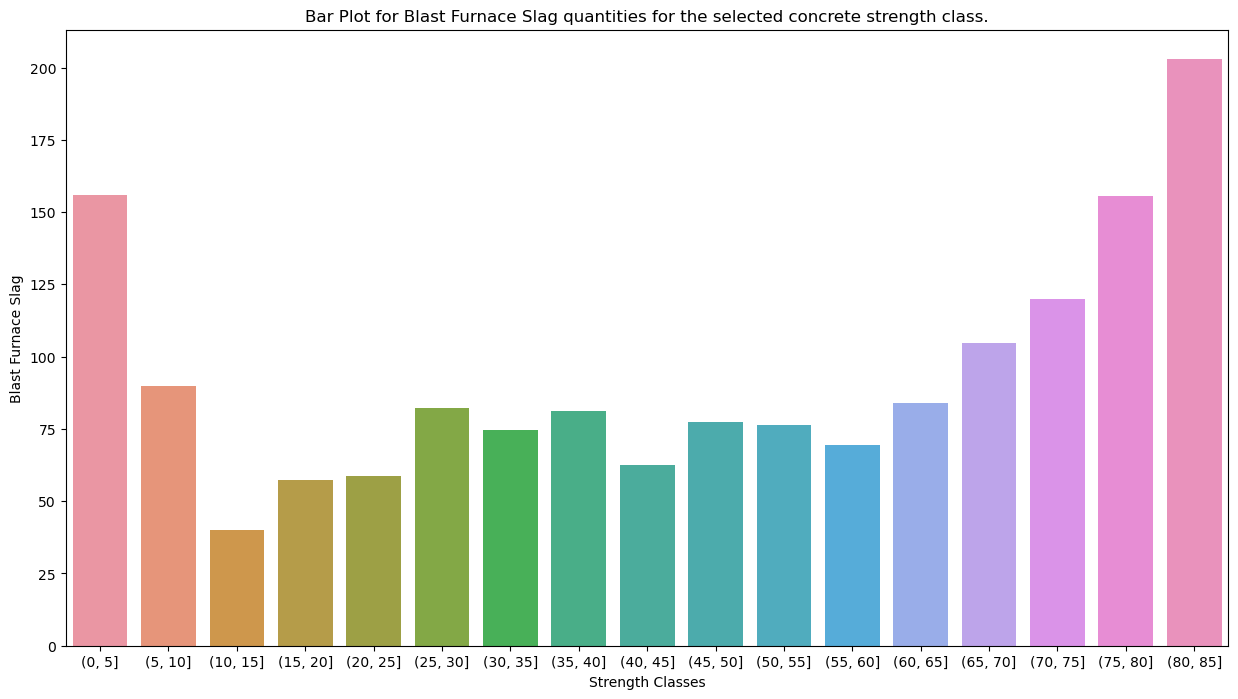

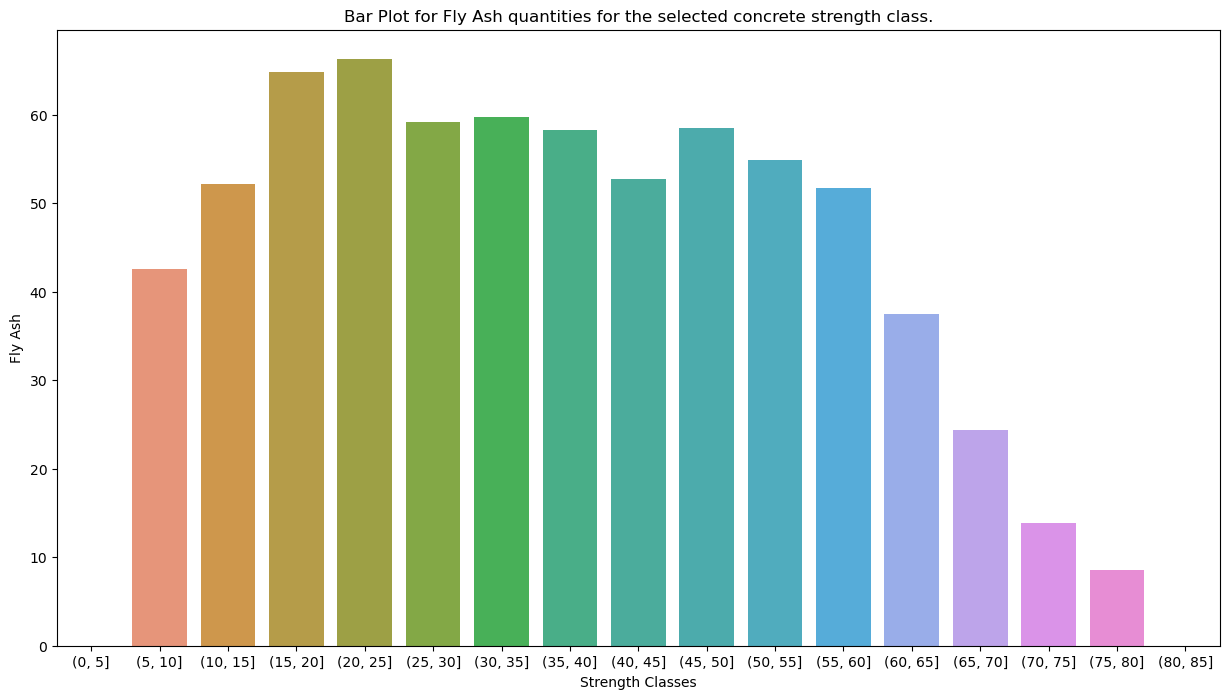

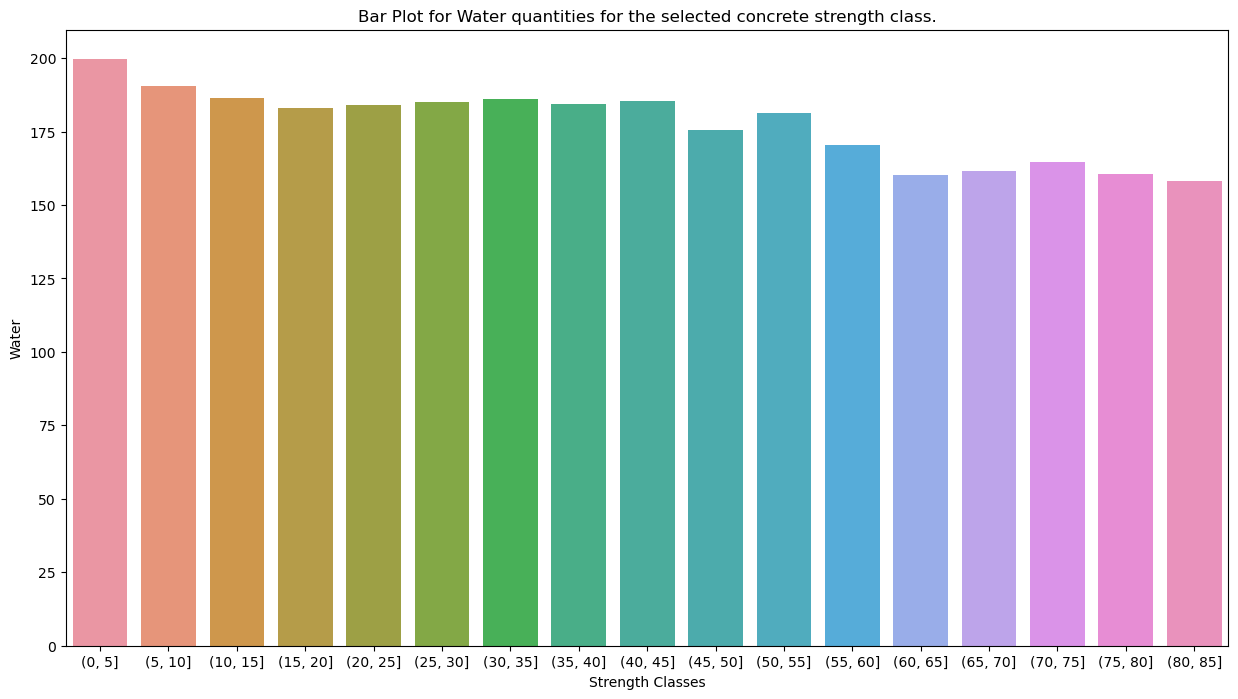

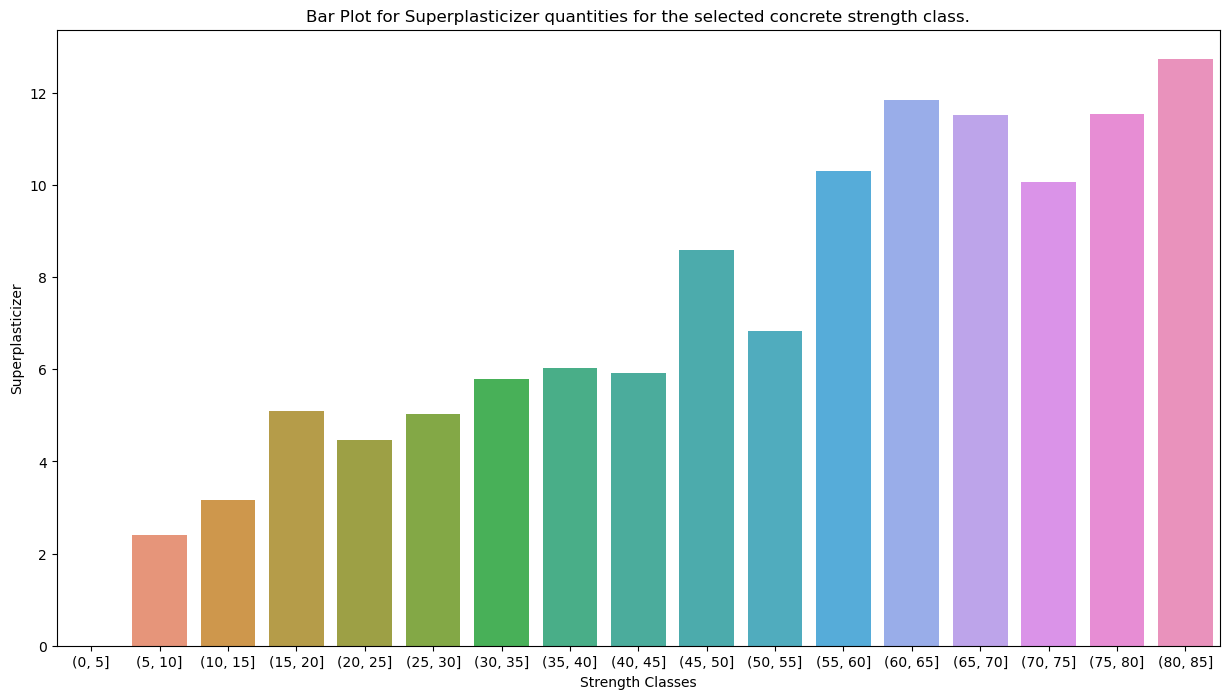

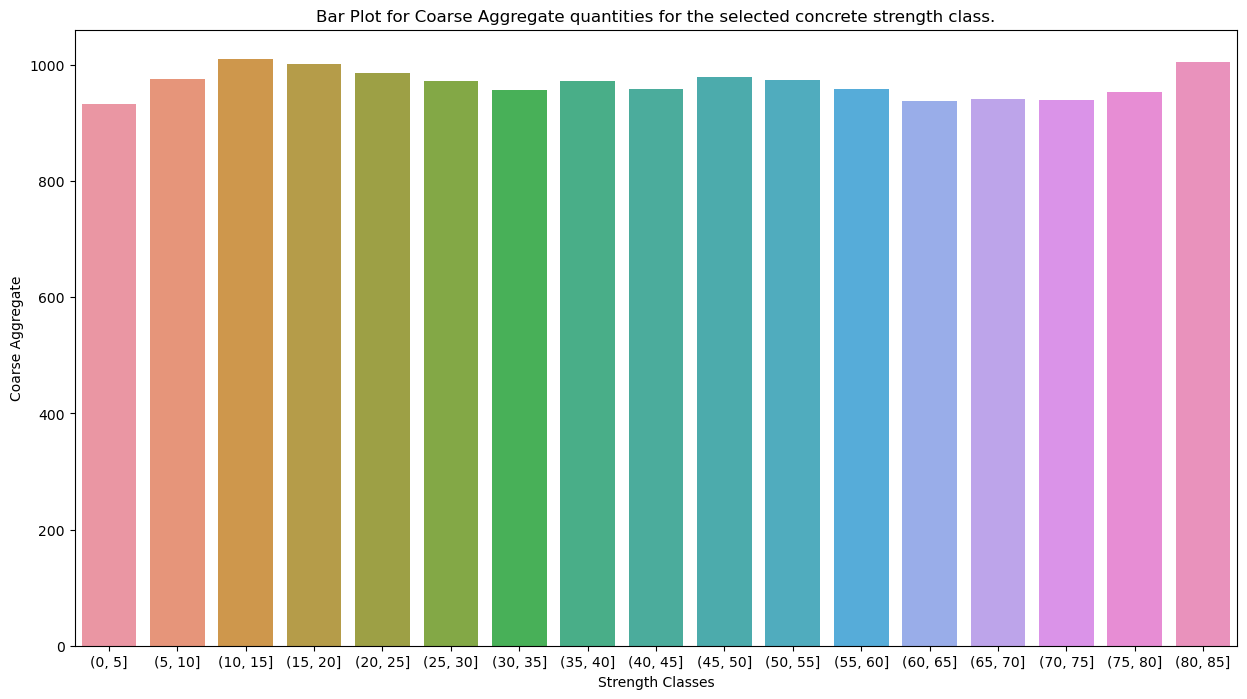

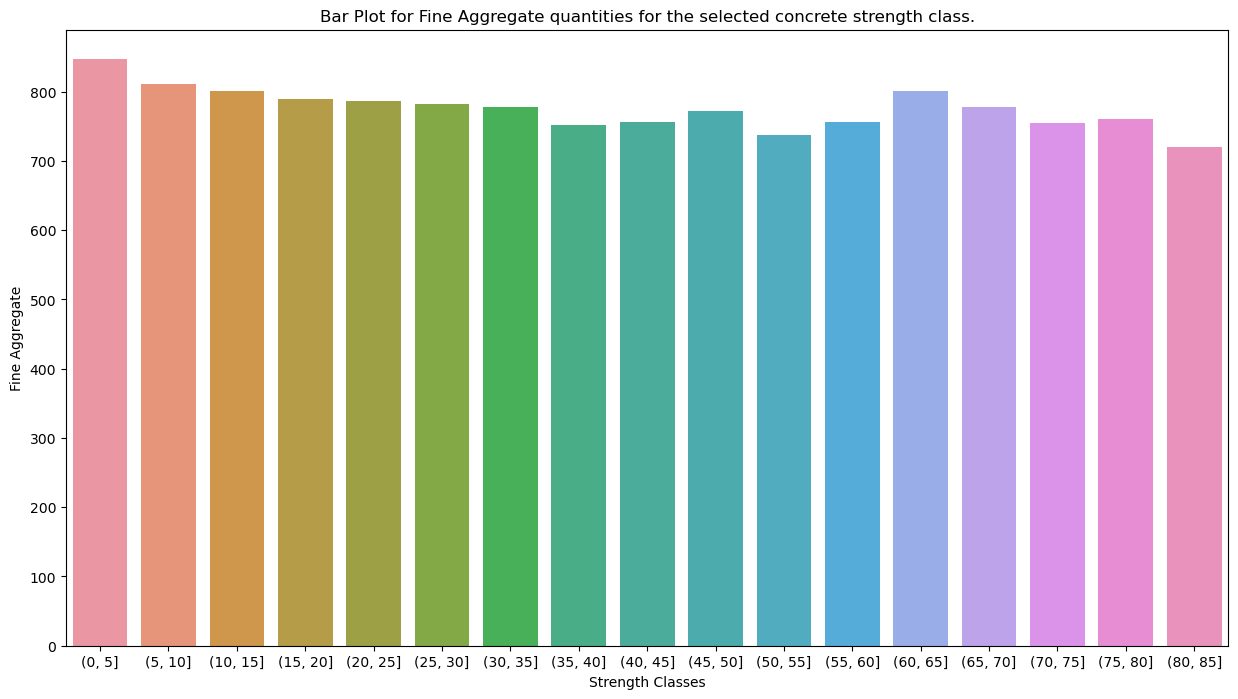

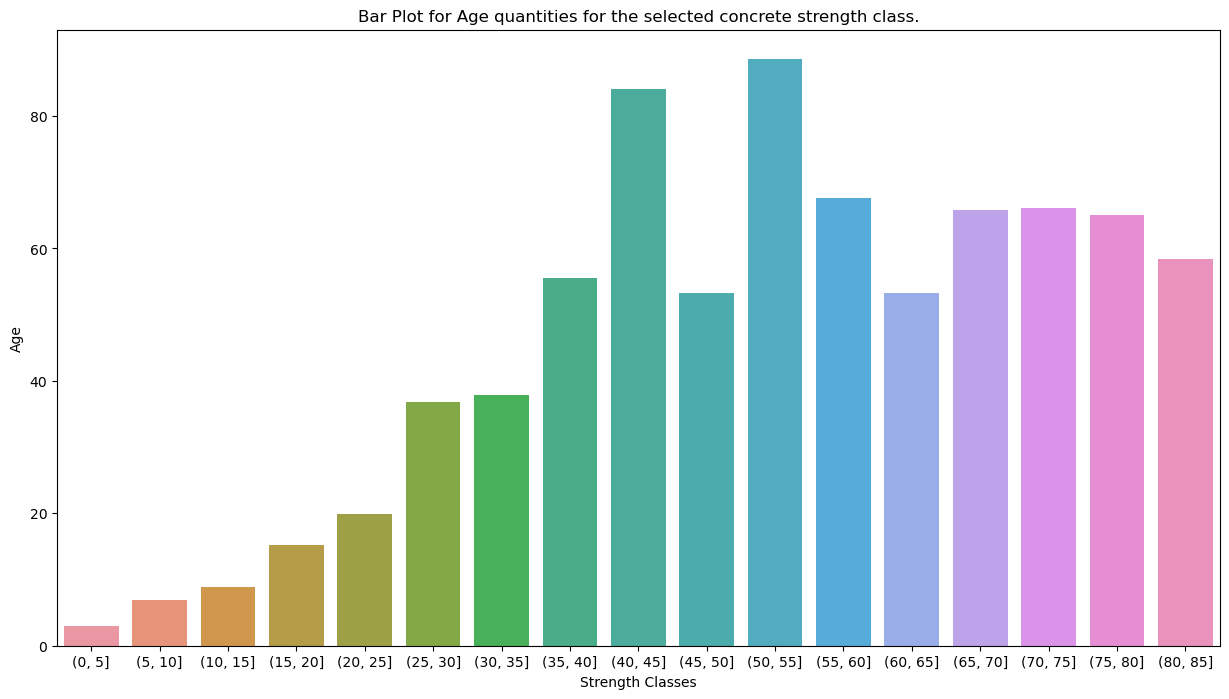

In [7]:
# Creating 5 steps bins for Strength.
df['Strength_bins'] = pd.cut(df['Strength'], bins=range(0, int(df['Strength'].max()) + 5, 5), right=True)

# Loop for bar plots creating  - dependency Strenght on particular features.
for feature in selected_features[:-1]:
    plt.figure(figsize=(15, 8))
    sns.barplot(x='Strength_bins', y=feature, data=df, errorbar=None)
    plt.title(f'Bar Plot for {feature} quantities for the selected concrete strength class.')
    plt.xlabel('Strength Classes')
    plt.ylabel(feature)
    plt.show()

# Model with standardization and scaling

In [8]:
# Splitind data set into features and label.
#Removing columns which contain lables data.
X = df.drop(['Strength', 'Strength_bins'], axis=1)
#Creating set with labes aonly.
y = df['Strength']

In [9]:
#Standardization.
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X

array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.27973311],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  3.55306569],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.27973311],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.27973311],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.27973311]])

In [11]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [12]:
# Spliting for train and test parts with recommended ratio 0.2-0.8, 
# and setting constant random state for repetitive cycles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating model with additional parameters.
RFR = RandomForestRegressor(
    n_estimators=500,  # Number of the trees
    max_depth=40,      # Max depth of the trees.
    min_samples_split=2,  # Minimum number of samples for node splitting.
    min_samples_leaf=1,   # Minimum number of samples in leaves node.
    random_state=42
)

# Traning model.
RFR.fit(X_train, y_train)

# Prediction with test data.
y_pred = RFR.predict(X_test)

In [13]:
#Errors measurement.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting results.
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 30.212101467631978
R-squared: 0.8827519962847793


# Model without standardization and scaling

In [14]:
df = pd.read_csv("concrete_data.csv")

In [15]:
# Splitind data set into features and label.
#Removing columns which contain lables data.
X = df.drop(['Strength'], axis=1)
#Creating set with labes aonly.
y = df['Strength']

In [16]:
# Spliting for train and test parts with recommended ratio 0.2-0.8, 
# and setting constant random state for repetitive cycles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating model with additional parameters.
RFR = RandomForestRegressor(
    n_estimators=500,  # Number of the trees
    max_depth=40,      # Max depth of the trees.
    min_samples_split=2,  # Minimum number of samples for node splitting.
    min_samples_leaf=1,   # Minimum number of samples in leaves node.
    random_state=42
)


RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)

In [17]:
#Errors measurement.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting results.
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 30.148967876125692
R-squared: 0.882997006966324


In [18]:
# Printing importance of the features.
feature_importances = RFR.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
              Feature  Importance
0       concrete_data    0.329340
1  Blast Furnace Slag    0.076823
2             Fly Ash    0.018627
3               Water    0.125179
4    Superplasticizer    0.054093
5    Coarse Aggregate    0.027930
6      Fine Aggregate    0.036030
7                 Age    0.331979


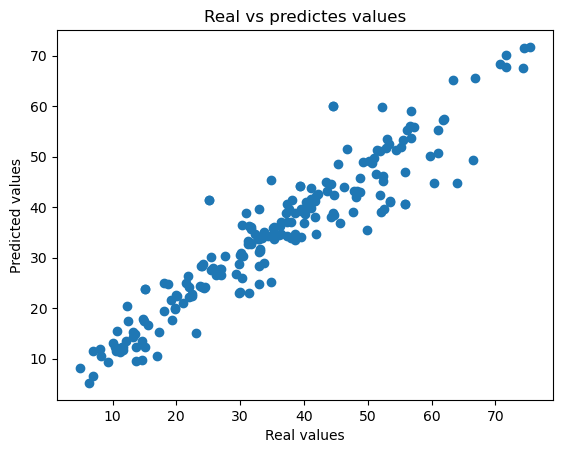

In [19]:
#Scatter plot for predicted and real values.
plt.scatter(y_test, y_pred)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs predictes values')
plt.show()

In [20]:
# Creating and printing data set with: real values, predicted values, and differences between them.
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': y_test - y_pred})
print("Prediction Results:")
print(results_df.head(10)) 

Prediction Results:
      Actual  Predicted      Error
31     52.91  51.636240   1.273760
109    55.90  40.669614  15.230386
136    74.50  71.458400   3.041600
88     35.30  34.684147   0.615853
918    10.54  11.527140  -0.987140
1025   44.28  44.551840  -0.271840
870    23.69  24.373020  -0.683020
318    45.37  48.528740  -3.158740
261    37.40  36.947420   0.452580
535    48.85  43.015520   5.834480


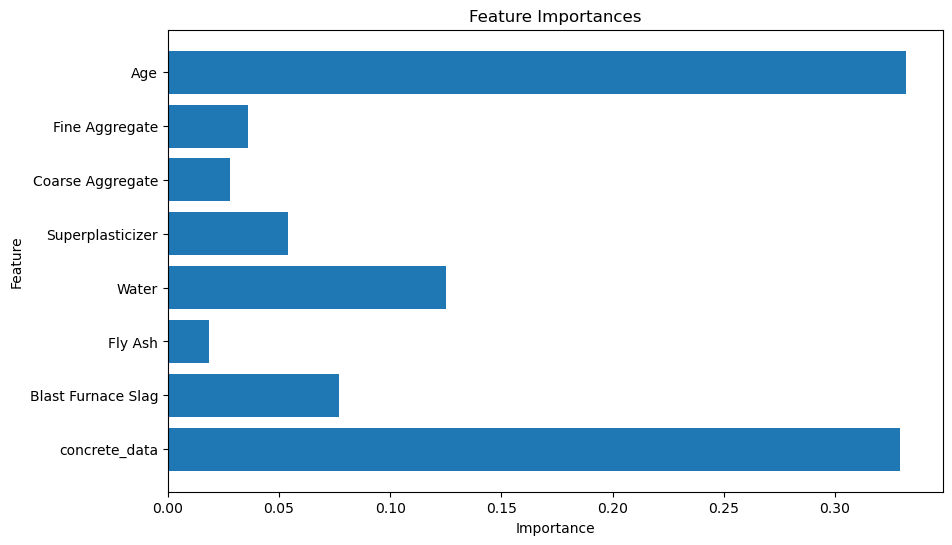

In [21]:
# Plotting importance of the features.
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# LIME EXPLAINER

In [22]:
from lime import lime_tabular
from tabulate import tabulate  # Import the tabulate module
X_test

concrete_data  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
31           266.0               114.0      0.0  228.0               0.0   
109          362.6               189.0      0.0  164.9              11.6   
136          389.9               189.0      0.0  145.9              22.0   
88           362.6               189.0      0.0  164.9              11.6   
918          145.0                 0.0    179.0  202.0               8.0   
..             ...                 ...      ...    ...               ...   
482          446.0                24.0     79.0  162.0              11.6   
545          255.0                 0.0      0.0  192.0               0.0   
110          286.3               200.9      0.0  144.7              11.2   
514          424.0                22.0    132.0  168.0               8.9   
602          339.0                 0.0      0.0  197.0               0.0   

     Coarse Aggregate  Fine Aggregate  Age  
31              932.0           670.0  365  
109             944.7           755.8    7  
136             944.7           755.8   28  
88              944.7           755.8    3  
918             824.0           869.0   28  
..                ...             ...  ...  
482             967.0           712.0   56  
545             889.8           945.0   28  
110            1004.6           803.7    7  
514             822.0           750.0   56  
602             968.0           781.0   90  

[206 rows x 8 columns]

In [23]:
# Reset the index of X_test
X_test = X_test.reset_index(drop=True)
X_test

concrete_data  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0            266.0               114.0      0.0  228.0               0.0   
1            362.6               189.0      0.0  164.9              11.6   
2            389.9               189.0      0.0  145.9              22.0   
3            362.6               189.0      0.0  164.9              11.6   
4            145.0                 0.0    179.0  202.0               8.0   
..             ...                 ...      ...    ...               ...   
201          446.0                24.0     79.0  162.0              11.6   
202          255.0                 0.0      0.0  192.0               0.0   
203          286.3               200.9      0.0  144.7              11.2   
204          424.0                22.0    132.0  168.0               8.9   
205          339.0                 0.0      0.0  197.0               0.0   

     Coarse Aggregate  Fine Aggregate  Age  
0               932.0           670.0  365  
1               944.7           755.8    7  
2               944.7           755.8   28  
3               944.7           755.8    3  
4               824.0           869.0   28  
..                ...             ...  ...  
201             967.0           712.0   56  
202             889.8           945.0   28  
203            1004.6           803.7    7  
204             822.0           750.0   56  
205             968.0           781.0   90  

[206 rows x 8 columns]

In [24]:
# Creating LimeTabularExplainer
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Strength'], mode='regression')


In [25]:
# Creation list to write exolanations.
explanations = []

# Creation a loop to make explanation for a precise number of samples.
for index in range(3):
    # Selection indest of the sample.
    selected_index = int(input("Enter the index for the test example: "))  
    chosen_sample = X_test.loc[[selected_index]]

    # Initialization explanation for the applied model.
    
    explanation = explainer.explain_instance(chosen_sample.values[0], RFR.predict, 
                                             num_features=len(X_train.columns))
    explanations.append((chosen_sample, explanation))
chosen_sample.values[0] 

Enter the index for the test example: 5


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Enter the index for the test example: 5


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Enter the index for the test example: 5


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


array([276.4, 116. ,  90.3, 179.6,   8.9, 870.1, 768.3,  28. ])

In [26]:
# Plotting results of the explanations.
for selected_index, (chosen_sample, explanation) in zip(range(1, 4), explanations):
    # Plotting table with smaple data
    print(f"\nChosen data for example {selected_index}:\n")
    print(tabulate(chosen_sample, headers='keys', tablefmt='pretty'))

    # Plotting explanation results like a graph
    print(f"\nExplanation for example {selected_index}:\n")
    explanation.show_in_notebook() 


Chosen data for example 1:

+---+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+
|   | concrete_data | Blast Furnace Slag | Fly Ash | Water | Superplasticizer | Coarse Aggregate | Fine Aggregate | Age  |
+---+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+
| 5 |     276.4     |       116.0        |  90.3   | 179.6 |       8.9        |      870.1       |     768.3      | 28.0 |
+---+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+

Explanation for example 1:




Chosen data for example 2:

+---+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+
|   | concrete_data | Blast Furnace Slag | Fly Ash | Water | Superplasticizer | Coarse Aggregate | Fine Aggregate | Age  |
+---+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+
| 5 |     276.4     |       116.0        |  90.3   | 179.6 |       8.9        |      870.1       |     768.3      | 28.0 |
+---+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+

Explanation for example 2:




Chosen data for example 3:

+---+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+
|   | concrete_data | Blast Furnace Slag | Fly Ash | Water | Superplasticizer | Coarse Aggregate | Fine Aggregate | Age  |
+---+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+
| 5 |     276.4     |       116.0        |  90.3   | 179.6 |       8.9        |      870.1       |     768.3      | 28.0 |
+---+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+

Explanation for example 3:



In [27]:
explanation.as_map()


{0: [(0, -3.611163200997162),
  (7, -3.0851890059341),
  (3, -2.264052083099253),
  (1, -1.3531507549961845),
  (4, -1.3490106697961375),
  (5, -1.0811099708332497),
  (6, -0.6251409812784091),
  (2, 0.2836112532463257)],
 1: [(0, 3.611163200997162),
  (7, 3.0851890059341),
  (3, 2.264052083099253),
  (1, 1.3531507549961845),
  (4, 1.3490106697961375),
  (5, 1.0811099708332497),
  (6, 0.6251409812784091),
  (2, -0.2836112532463257)]}

# SHAP EXPLAINER

In [28]:
# Analiza SHAP

explainer = shap.Explainer(RFR)
shap_values = explainer.shap_values(X_test)

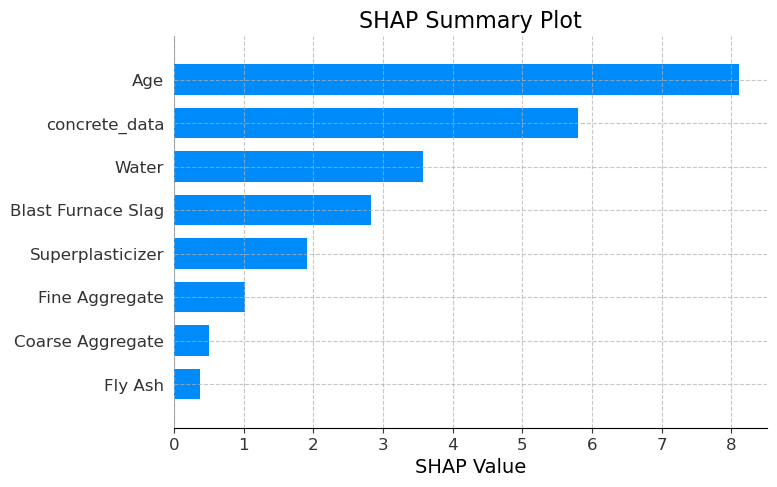

In [29]:
# Plotting SHAP Summary
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names, show=False)

# Plot parameters
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("SHAP Value", fontsize=14)
plt.title("SHAP Summary Plot", fontsize=16)
plt.show()

In [30]:
#Force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], feature_names=feature_names, show=True)

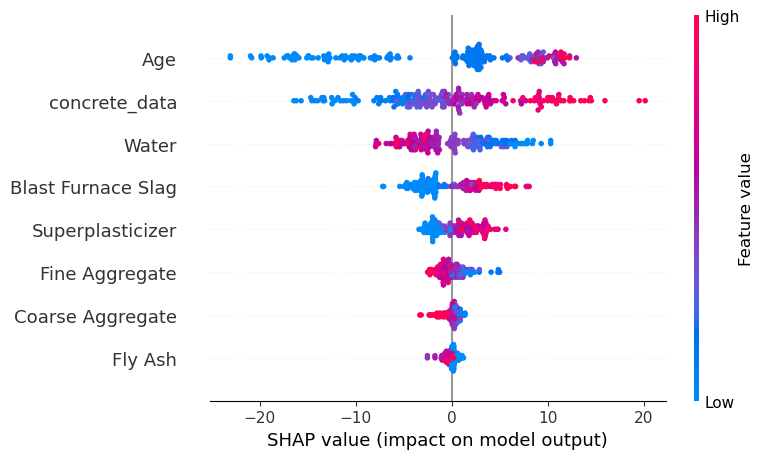

In [31]:
#Plot SHAP - sumary for all cases.
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
plt.show()

In [32]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], feature_names=feature_names, show=True)

In [33]:
# Setting list to safe results of the explanations
shap_explanations = []

# Loop for chosen indexes.
for _ in range(3):
    # Choosing sample.
    selected_index = int(input("Enter the index for the test example: "))  
    chosen_sample = X_test.loc[[selected_index]]

    # Explanation model applying SHAP.
    shap_values = explainer.shap_values(chosen_sample)
    shap_explanations.append((chosen_sample, shap_values))

Enter the index for the test example: 5
Enter the index for the test example: 15
Enter the index for the test example: 25



Chosen data for example 1:

+---+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+
|   | concrete_data | Blast Furnace Slag | Fly Ash | Water | Superplasticizer | Coarse Aggregate | Fine Aggregate | Age  |
+---+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+
| 5 |     276.4     |       116.0        |  90.3   | 179.6 |       8.9        |      870.1       |     768.3      | 28.0 |
+---+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+


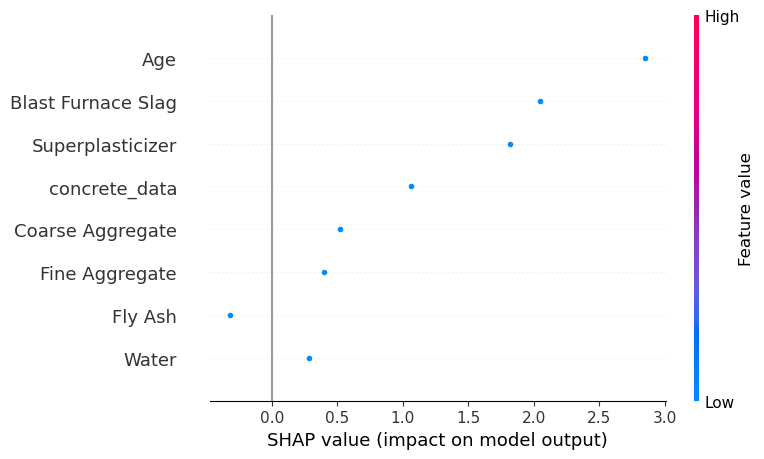

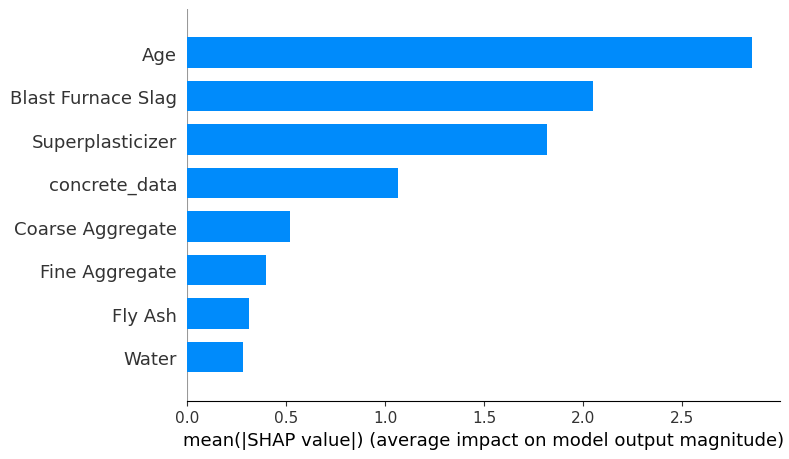

------------------------------------


------------------------------------

Chosen data for example 2:

+----+---------------+--------------------+---------+-------+------------------+------------------+----------------+-----+
|    | concrete_data | Blast Furnace Slag | Fly Ash | Water | Superplasticizer | Coarse Aggregate | Fine Aggregate | Age |
+----+---------------+--------------------+---------+-------+------------------+------------------+----------------+-----+
| 15 |     228.0     |       342.1        |   0.0   | 185.7 |       0.0        |      955.8       |     674.3      | 7.0 |
+----+---------------+--------------------+---------+-------+------------------+------------------+----------------+-----+


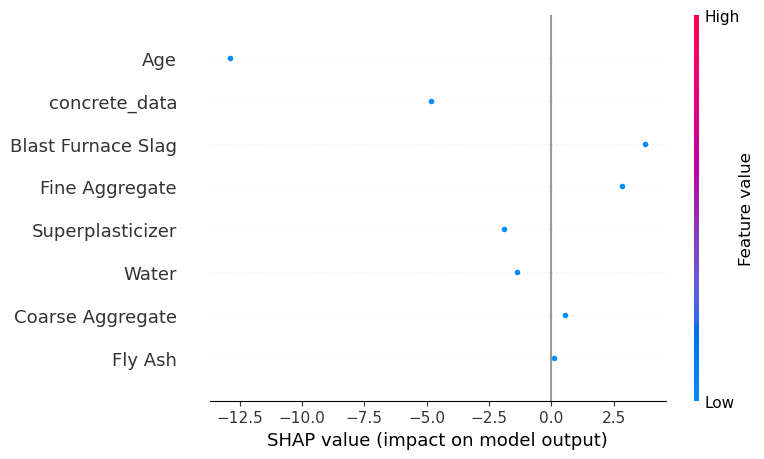

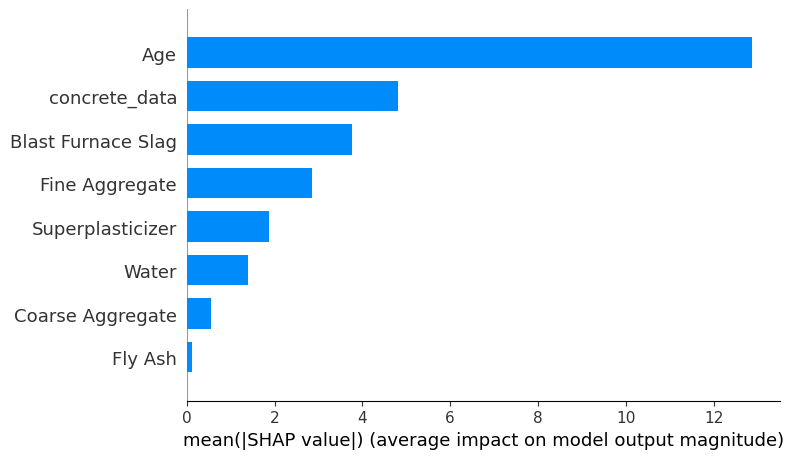

------------------------------------


------------------------------------

Chosen data for example 3:

+----+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+
|    | concrete_data | Blast Furnace Slag | Fly Ash | Water | Superplasticizer | Coarse Aggregate | Fine Aggregate | Age  |
+----+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+
| 25 |     249.1     |        0.0         |  98.8   | 158.1 |       12.8       |      987.8       |     889.0      | 28.0 |
+----+---------------+--------------------+---------+-------+------------------+------------------+----------------+------+


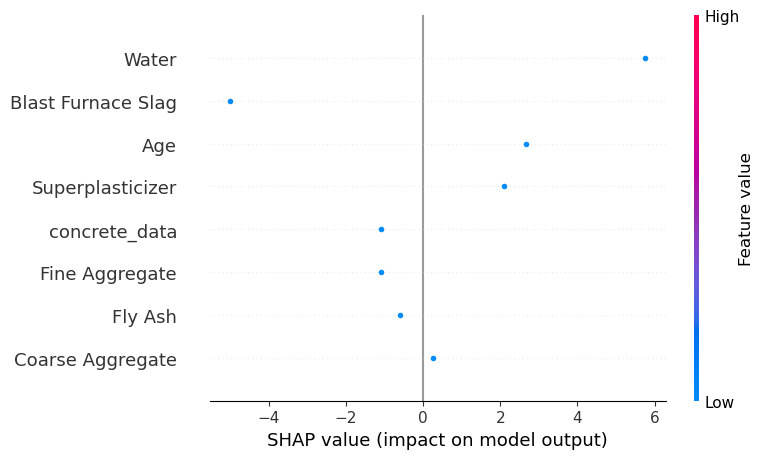

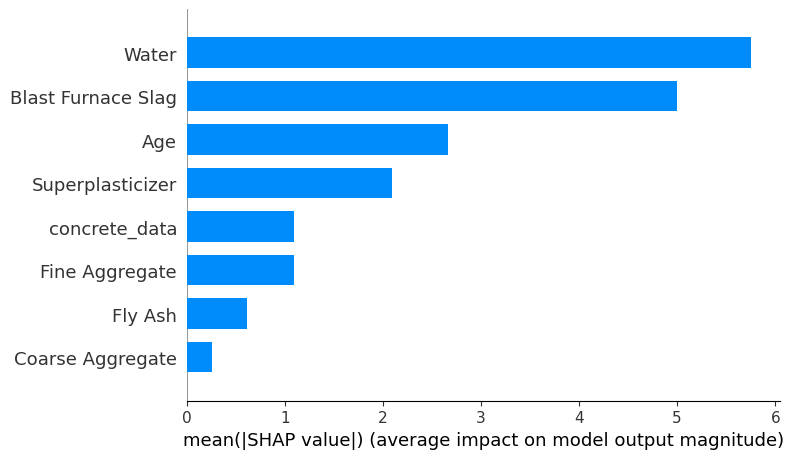

------------------------------------


------------------------------------


In [34]:
# Loop for input 3 samples for SHAP explainer.
for selected_index, (chosen_sample, shap_values) in zip(range(1, 4), shap_explanations):
    # Printing chosen examples.
    print(f"\nChosen data for example {selected_index}:\n")
    print(tabulate(chosen_sample, headers='keys', tablefmt='pretty'))

    # Plotting summary scatter
    shap.summary_plot(shap_values, chosen_sample, feature_names=feature_names, show=False)

    # Setting layout.
    #plt.tight_layout()
    plt.show()

    # Plotting summary bar plot.
    shap.summary_plot(shap_values, chosen_sample, plot_type="bar", feature_names=feature_names, show=False)

    # Setting layout.
    #plt.tight_layout()
    plt.show()

    # Plot SHAP force.
    
    print('------------------------------------')
    shap.initjs()
    shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], feature_names=feature_names, show=True)
    plt.show()
    print('------------------------------------')


 
    


# PARTIAL DEPENDENCE

Partial dependence plots showing the dependence of the result on individual features

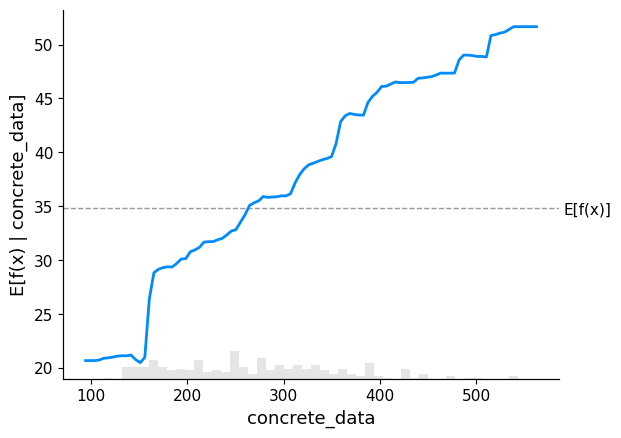

In [35]:
shap.plots.partial_dependence(
    "concrete_data", RFR.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=False)

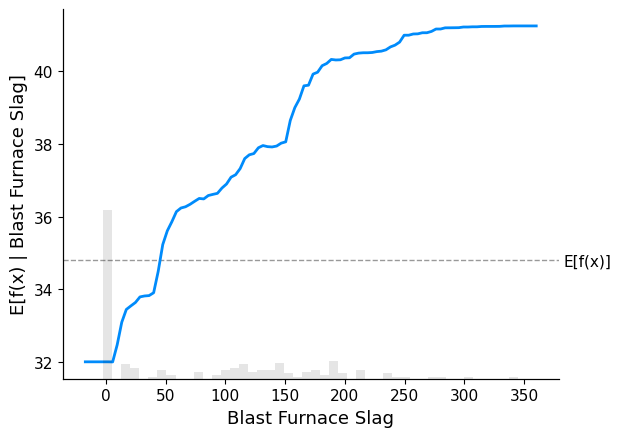

In [36]:
  shap.plots.partial_dependence(
    "Blast Furnace Slag", RFR.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=False)

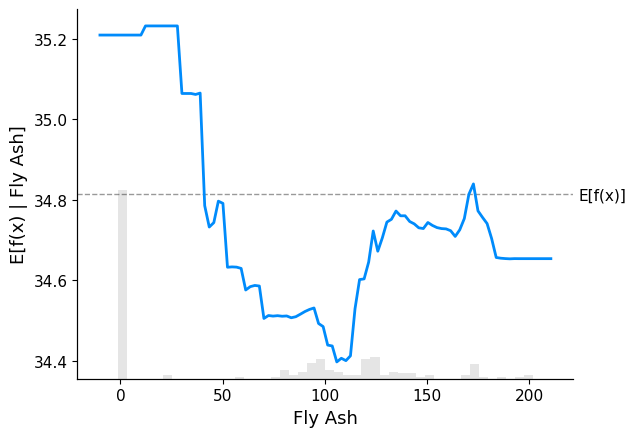

In [37]:
shap.plots.partial_dependence(
    "Fly Ash", RFR.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=False)

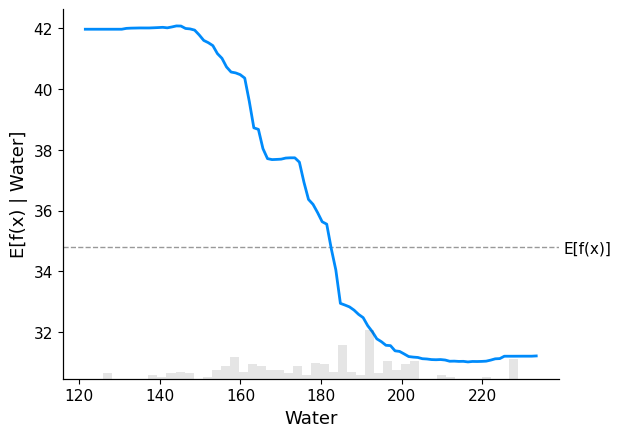

In [38]:
  shap.plots.partial_dependence(
    "Water", RFR.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=False)

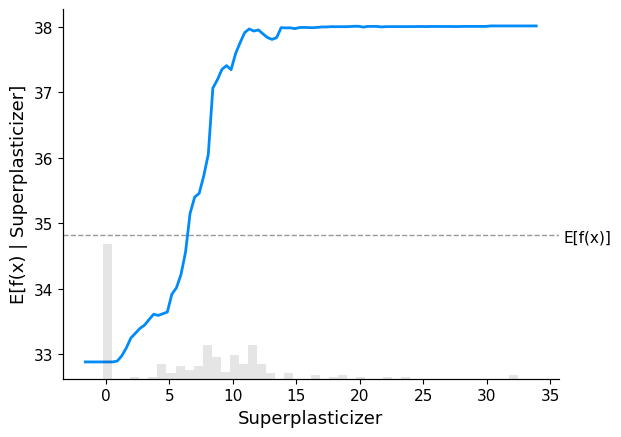

In [39]:
shap.plots.partial_dependence(
    "Superplasticizer", RFR.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=False)

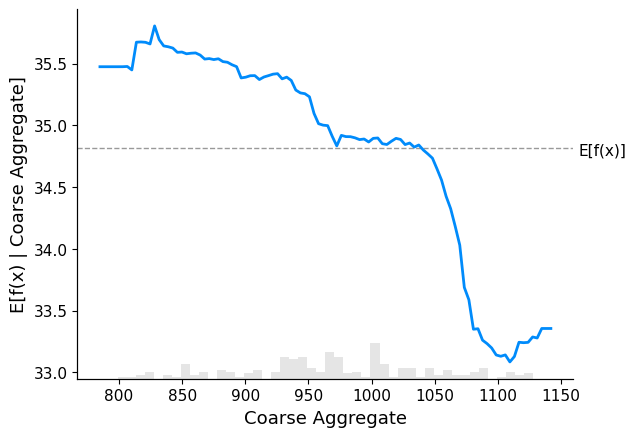

In [40]:
shap.plots.partial_dependence(
    "Coarse Aggregate", RFR.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=False)

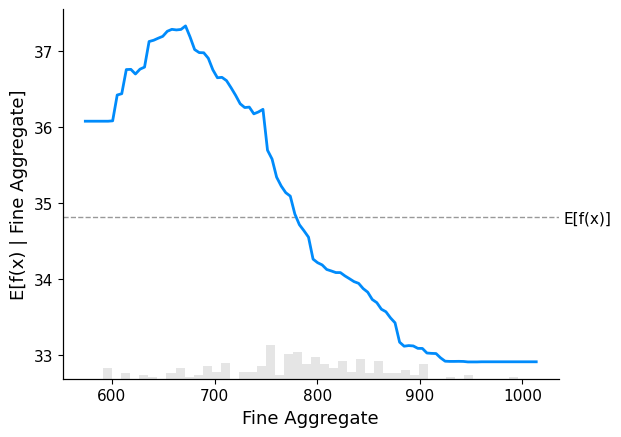

In [41]:
shap.plots.partial_dependence(
    "Fine Aggregate", RFR.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=False)

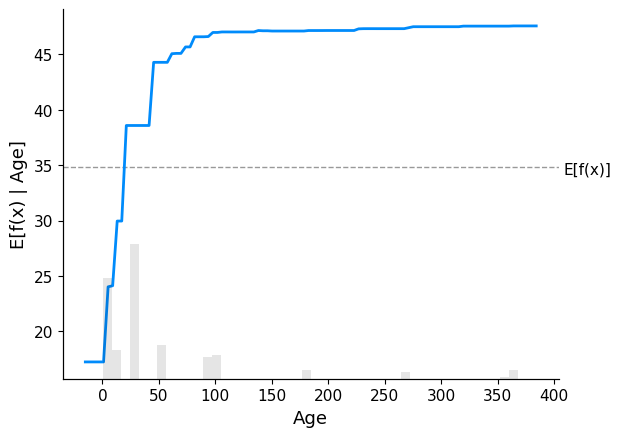

In [42]:
  shap.plots.partial_dependence(
    "Age", RFR.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=False)